Irkutsk data getter

In [2]:
import pandas as pd
import numpy as np

In [3]:
csv_data = pd.read_csv(r'irk_data/thermal_imager.csv', sep=',')
csv_data = csv_data.loc[csv_data['node'] == 54]
csv_data = csv_data.drop(['node'], axis=1)
csv_data.head()


,pressure,date,time,humidity,ambient_temperature,amperage,wind_speed,imager_temperature
0,976.1,13.04.2023,13:59,30.4,2.0,334.3676,0.0,11.9
42,974.1,13.04.2023,16:48,31.4,3.1,254.6438,1.1,8.6
90,974.1,13.04.2023,16:49,30.1,3.0,258.6109,1.4,8.4
107,976.5,13.04.2023,13:14,33.7,1.0,377.8762,2.4,7.1
144,976.5,13.04.2023,13:15,33.6,0.9,375.0806,2.7,6.3


In [73]:

csv_data.drop(csv_data[csv_data['wind_speed'] > 1.0].index, inplace = True)
csv_data.drop(csv_data[csv_data['imager_temperature'] - csv_data['ambient_temperature'] > 15.0].index, inplace = True)
csv_data.size

KeyError: 'wind_speed'

In [74]:
days_in_month = [0,                                                           # 1
                 31,                                                          # 2
                 31 + 28,                                                     # 3
                 31 + 28 + 31,                                                # 4
                 31 + 28 + 31 + 30,                                           # 5
                 31 + 28 + 31 + 30 + 31,                                      # 6
                 31 + 28 + 31 + 30 + 31 + 30,                                 # 7
                 31 + 28 + 31 + 30 + 31 + 30 + 31,                            # 8
                 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31,                       # 9
                 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30,                  # 10
                 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31,             # 11
                 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30,        # 12
                 ]
for days in days_in_month:
    print(days)

0
31
59
90
120
151
181
212
243
273
304
334


In [75]:
np_data = csv_data.to_numpy()

In [76]:
for sheet in np_data:
    date_str = sheet[1]
    time_str = sheet[2]
    
    splited_date = date_str.split('.')
    splited_time = time_str.split(':')
    
    new_date = days_in_month[int(splited_date[1]) - 1] + int(splited_date[0])
    new_time = int(splited_time[1]) / 60 + int(splited_time[0])
    
    sheet[1] = new_date / 365
    sheet[2] = new_time / 24
    
print(np_data)

AttributeError: 'numpy.float64' object has no attribute 'split'

In [82]:
i = 1
indexes = []
res = []
while i < len(np_data):
    if abs(np_data[i][-1] - np_data[i-1][-1]) > 0.5 and np_data[i][2] - np_data[i-1][2] < 0.15:
        indexes.append(i)
    elif abs(np_data[i][-1] - np_data[i-1][-1]) > 1.:
        indexes.append(i)
    else:
        res.append(np_data[i])
    i += 1
    
np_data = np.asarray(res)
print(np_data)

[[ 0.13888889  0.763       0.297      ...  0.16        0.585
  10.2       ]
 [ 0.06944444  0.763       0.287      ...  0.05        0.5925
  11.5       ]
 [ 0.06944444  0.761       0.314      ...  0.24        0.59083333
  10.6       ]
 ...
 [ 0.27777778  0.731       0.933      ...  0.26        0.53833333
   4.8       ]
 [ 0.34722222  0.733       0.935      ...  0.23        0.54
   4.6       ]
 [ 0.06944444  0.733       0.93       ...  0.22        0.53833333
   4.6       ]]


In [83]:
x = []
y = []
for i in range(1, len(np_data)):
    prev_sheet = np_data[i - 1]
    sheet = np_data[i]
    pressure = ( sheet[0] - 900 ) / 100
    humidity = sheet[3] / 100
    ambient_temperature = (sheet[4]+60) / 120
    amperage = sheet[5] / 1000
    wind_speed = sheet[6] / 10
    prev_temp = (prev_sheet[-1]+60) / 120
    delta = sheet[2] - prev_sheet[2]
    interval = min(1 + delta, abs(delta)) * 100
    targetTemp = sheet[7]
    
    x.append(np.asarray([[interval, pressure, humidity, ambient_temperature, amperage, wind_speed, prev_temp]]))
    y.append(np.asarray([targetTemp]))

x = np.asarray(x)
y = np.asarray(y)
print(x, y)

[[[ 1.00000000e+00 -8.99930556e+00  5.18333333e-03 ...  5.00000000e-05
    5.92500000e-02  5.85000000e-01]]

 [[ 2.70000000e+00 -8.99930556e+00  5.14166667e-03 ...  2.40000000e-04
    5.90833333e-02  5.95833333e-01]]

 [[ 9.00000000e-01 -8.99930556e+00  5.10000000e-03 ...  3.30000000e-04
    5.34166667e-02  5.88333333e-01]]

 ...

 [[ 3.00000000e-01 -8.99722222e+00  5.17500000e-03 ...  2.60000000e-04
    5.38333333e-02  5.38333333e-01]]

 [[ 2.00000000e-01 -8.99652778e+00  5.18333333e-03 ...  2.30000000e-04
    5.40000000e-02  5.40000000e-01]]

 [[ 5.00000000e-01 -8.99930556e+00  5.18333333e-03 ...  2.20000000e-04
    5.38333333e-02  5.38333333e-01]]] [[11.5]
 [10.6]
 [ 4.4]
 ...
 [ 4.8]
 [ 4.6]
 [ 4.6]]


In [84]:
from ClassModules import *

In [85]:
model = Sequential('adam', ALPHA=0.00015, type_='mean_squared_error')
model.add(Dense(72, linear, input_shape=7))
model.add(Dense(32, sin))
model.add(Dense(16, backLinear))
model.add(Dense(64, linear))
model.add(Dense(1, linear))

mean_squared_error


In [86]:
dataset = []
res = []
for i in range(len(x)):
    dataset.append([x[i], y[i]])
    res.append([x[i][0][0],
                x[i][0][1],
                x[i][0][2],
                x[i][0][3],
                x[i][0][4],
                x[i][0][5],
                x[i][0][6],
                y[i][0]])
res = np.asarray(res)
np.savetxt('node_54.csv', res, delimiter=",")
print(dataset[0])  


    

[array([[ 1.00000000e+00, -8.99930556e+00,  5.18333333e-03,
         5.02610338e-01,  5.00000000e-05,  5.92500000e-02,
         5.85000000e-01]]), array([11.5])]


In [72]:
csv_data = pd.read_csv(r'node_54.csv', sep=',')
csv_data.head()

,6.944444444444419773e-02,7.629999999999995675e-01,3.069999999999999951e-01,5.100000000000000089e-01,3.464937000000000156e-01,2.500000000000000000e-01,5.841666666666666119e-01,9.800000000000000711e+00
0,0.208333,0.763,0.298,0.511667,0.348766,0.09,0.581667,10.6
1,0.069444,0.763,0.297,0.510000,0.354818,0.10,0.588333,10.2
2,0.138889,0.763,0.297,0.512500,0.351677,0.16,0.585000,10.2
3,0.555556,0.763,0.302,0.516667,0.311530,0.13,0.585000,11.1
4,0.069444,0.763,0.287,0.518333,0.313241,0.05,0.592500,11.5


In [160]:
model.train(dataset, 500, False, False, 512)

([], [])

In [161]:
y_res = [model.predict(dataset[i][0])[0][0] for i in range(len(dataset))]

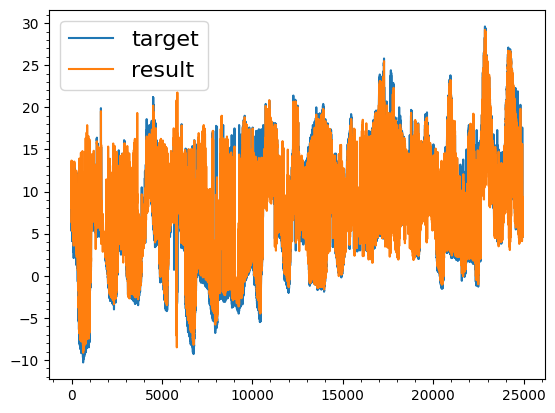

In [162]:
import matplotlib.pyplot as plt
plt.plot(y, label='target')
plt.plot(y_res, label='result')
plt.legend(fontsize=16)
plt.minorticks_on()
plt.show()